# Entendo o problema

• Contexto: Seu gerente quer que você identifique os grupos de compras mais importantes com base na renda, na idade e na pontuação de compras no shopping. Ele quer o número ideal de grupos e um rótulo para cada um deles.

• Problema: Entender os clientes-alvo de um shopping para que a equipe de marketing planeje a estratégia para a próxima campanha de marketing. 

• Solução: Dividisão o público do shopping em grupos acessíveis. Criação de subconjuntos do mercado com base em critérios demográficos e comportamentais para entender melhor o público-alvo das atividades de marketing

## Importanto bibliotecas

In [1]:
#Biblioteca para Análise de Dados
import pandas as pd 

#Biblioteca e algoritmo de clusterização
from sklearn.cluster import KMeans

#Biblioteca para Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Coletando os Dados

Um profissional da área de dados realizou a extração dos dados diretamente do Banco de Dados e forneceu um dataset em formato .csv contendo as observações realizadas pela equipe de marketing.

In [3]:
#Criando o DataFrame (df)
df = pd.read_csv("/content/clientes_shopping.csv")

## Análise exploratória de dados (EDA)

### Entendendo o Dataset

In [4]:
#Visualizando as cinco primeiras e cinco últimas observações
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
#Dimensionalidade do Dataset
linhas, colunas = df.shape
linhas, colunas

(200, 5)

In [6]:
#Sumário do Dataset: tipos de dados e valores não-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Nome dos atributos - tradução - tipos de dados:
- CustomerID - Identificação do Visitante - Integer
- Genre (Gender) - Gênero do Visitante - String
- Age - Idade do Visitante - Integer
- Annual Income (kR$) - Renda anual do visitante - Integer
- Spending Score (1-100) - Score do Visitante - Integer

In [7]:
#Primeira descrição estatística do Dataset
df.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


### Limpeza de dados

#### Excluindo coluna
A coluna CustomerID será excluida por não ser importante para a análise.

In [8]:
#Excluindo coluna CustomerID
df.drop(columns=["CustomerID"], inplace=True)

In [9]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Mudando o nome das colunas

In [10]:
#Renomeando colunas
df.rename(columns= {"Genre": "Genero", "Age": "Idade", "Annual Income (k$)": "Renda_Anual(kR$)", "Spending Score (1-100)": "Score(1-100)"}, inplace=True)

In [11]:
df.head()

,Genero,Idade,Renda_Anual(kR$),Score(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Traduzindo informações na colina Genero

In [12]:
#Conferindo valores únicos
df["Genero"].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
#Traduzindo informações
df["Genero"] = df["Genero"].replace(["Male", "Female"], ["Masculino", "Feminino"])

In [14]:
df.head()

,Genero,Idade,Renda_Anual(kR$),Score(1-100)
0,Masculino,19,15,39
1,Masculino,21,15,81
2,Feminino,20,16,6
3,Feminino,23,16,77
4,Feminino,31,17,40


In [15]:
#Duplicatas
df.duplicated().sum()

0

In [16]:
#Valores NaN
df.isna().sum()

Genero              0
Idade               0
Renda_Anual(kR$)    0
Score(1-100)        0
dtype: int64

In [17]:
#Valores nulos
df.isnull().sum()

Genero              0
Idade               0
Renda_Anual(kR$)    0
Score(1-100)        0
dtype: int64

### Descrição estatítica
Pós limpeza de dados

In [18]:
df.describe().round(2)

,Idade,Renda_Anual(kR$),Score(1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


### Análise univariável

#### Variáveis categóricas

**Gênero**

In [19]:
#Quantidade de Valores únicos
df["Genero"].nunique()

2

In [20]:
#Valores únicos
df["Genero"].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [21]:
#Quant. pessoas agrupadas por gênero
df["Genero"].value_counts()

Feminino     112
Masculino     88
Name: Genero, dtype: int64

In [22]:
#Quant. pessoas agrupada por gênero - porcentagem
df["Genero"].value_counts(normalize=True)

Feminino     0.56
Masculino    0.44
Name: Genero, dtype: float64

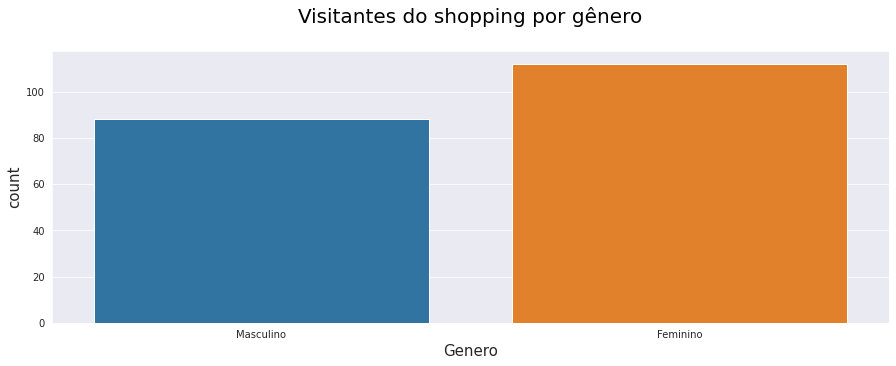

In [23]:
#Visualização da contagem de pessoas por gẽnero
plt.figure(figsize=(15, 5))
plt.title("Visitantes do shopping por gênero\n", fontsize=20, color='black')
plt.xlabel("Gênero", fontsize=15)
plt.ylabel("Contagem de Visitantes", fontsize=15)
sns.countplot(df['Genero'])
plt.show()

#### Variáveis numéricas

**Idade**

In [24]:
#Número de valores únicos
df["Idade"].nunique()

51

In [25]:
#Distribuição da Idade
df["Idade"].describe().round(2)

count    200.00
mean      38.85
std       13.97
min       18.00
25%       28.75
50%       36.00
75%       49.00
max       70.00
Name: Idade, dtype: float64

In [26]:
#Kurtosis da distribuição da Idade
#Assimetria da distribuição da Idade
print(f"Curtose: {df['Idade'].kurt()}")
print(f"Assimetria: {df['Idade'].skew()}")

Curtose: -0.6715728615981695
Assimetria: 0.48556885096681657


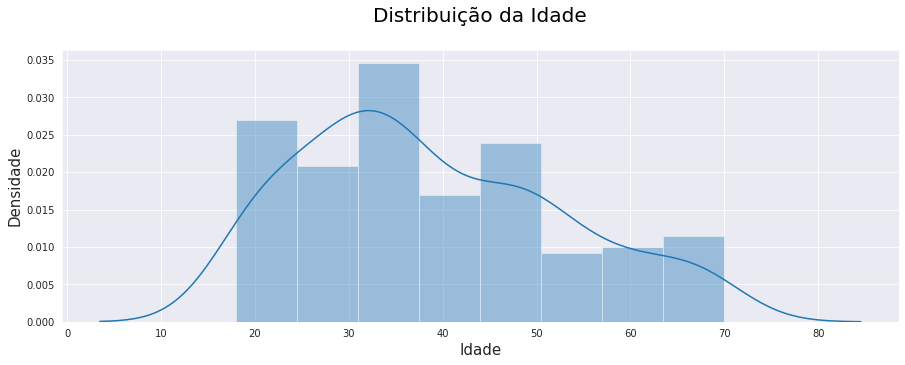

In [27]:
#Visualização da distribuição da Idade
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Idade\n", fontsize=20, color='black')
plt.xlabel("Variação da Idade", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.distplot(df["Idade"])
plt.show()

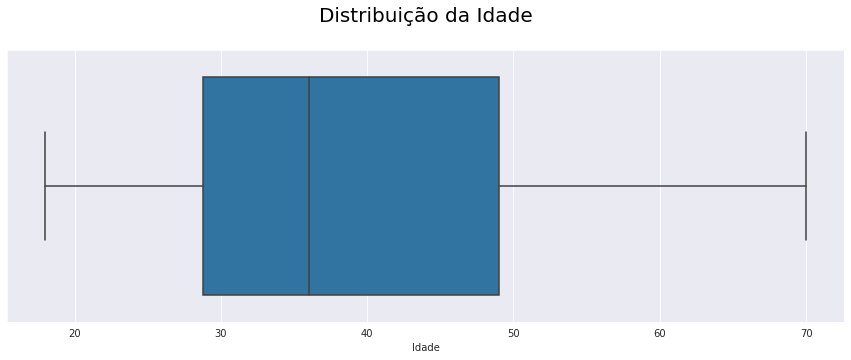

In [28]:
#Visualização boxplot para detecção de outliers
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Idade\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "Idade")
plt.show()

**Renda Anual (R$k)**

In [29]:
#Valores únicos
df.nunique()

Genero               2
Idade               51
Renda_Anual(kR$)    64
Score(1-100)        84
dtype: int64

In [30]:
#Distribuição da Renda_Anual(kR$)
df["Renda_Anual(kR$)"].describe().round(2)

count    200.00
mean      60.56
std       26.26
min       15.00
25%       41.50
50%       61.50
75%       78.00
max      137.00
Name: Renda_Anual(kR$), dtype: float64

A renda anual tem uma distribuição próxima da normal. Os valores de média e mediana são bem próximos.

In [31]:
#Kurtosis da distribuição da Renda_Anual(kR$)
#Assimetria da distribuição da Renda_Anual(kR$)
print(f"Curtose: {df['Renda_Anual(kR$)'].kurt()}")
print(f"Assimetria: {df['Renda_Anual(kR$)'].skew()}")

Curtose: -0.09848708652696203
Assimetria: 0.3218425498619055


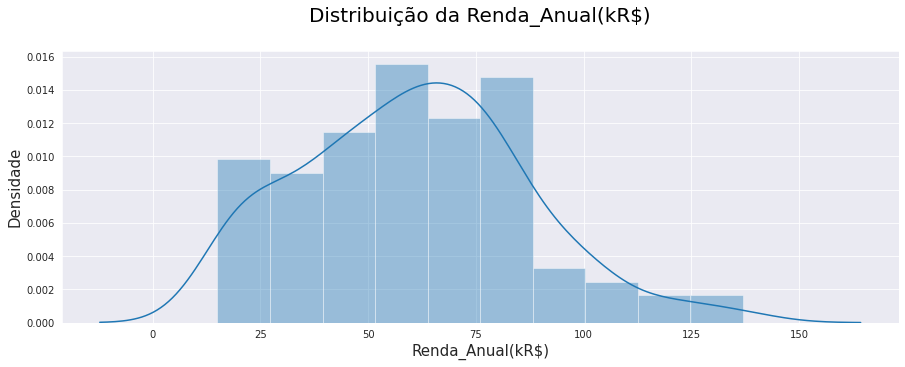

In [32]:
#Visualização da distribuição da Renda_Anual(kR$)
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Renda_Anual(kR$)\n", fontsize=20, color='black')
plt.xlabel("Renda_Anual(kR$)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.distplot(df["Renda_Anual(kR$)"])
plt.show()

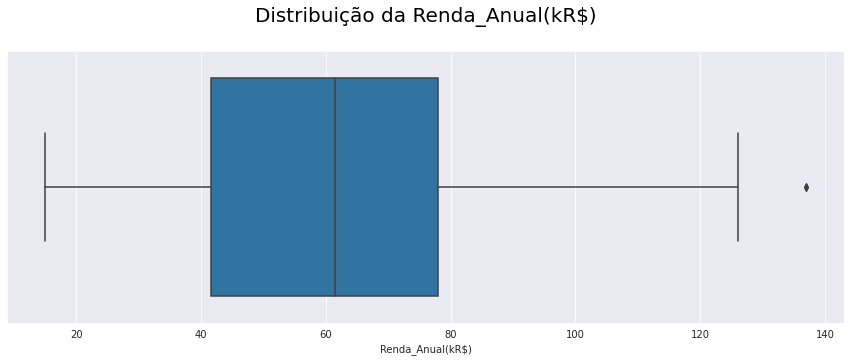

In [33]:
#Visualização boxplot para detecção de outliers
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Renda_Anual(kR$)\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "Renda_Anual(kR$)")
plt.show()

**Score(1-100)**

In [34]:
#Valores únicos
df["Score(1-100)"].nunique()

84

In [35]:
#Distribuição do Score(1-100)
df["Score(1-100)"].describe().round(2)

count    200.00
mean      50.20
std       25.82
min        1.00
25%       34.75
50%       50.00
75%       73.00
max       99.00
Name: Score(1-100), dtype: float64

O Score tem uma distribuição próxima da normal. Os valores de média e mediana são bem próximos.

In [36]:
#Kurtosis da distribuição do Score(1-100)
#Assimetria da distribuição do Score(1-100)
print(f"Curtose: {df['Score(1-100)'].kurt()}")
print(f"Assimetria: {df['Score(1-100)'].skew()}")

Curtose: -0.8266291062061502
Assimetria: -0.047220201374263374


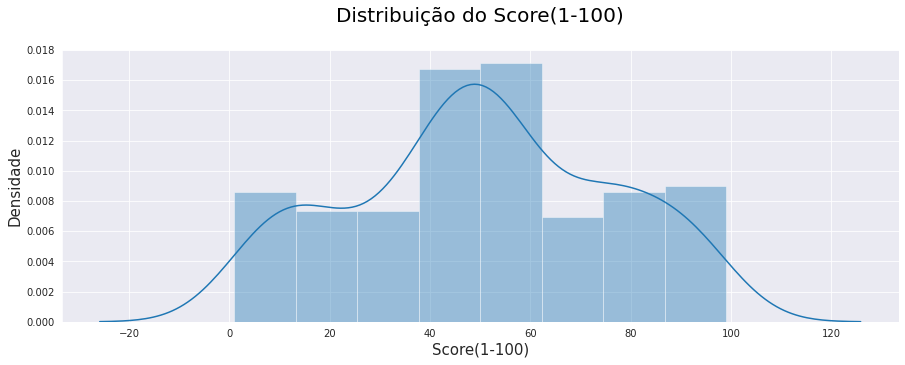

In [37]:
#Visualização da distribuição do Score(1-100)
plt.figure(figsize=(15, 5))
plt.title("Distribuição do Score(1-100)\n", fontsize=20, color='black')
plt.xlabel("Score(1-100)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.distplot(df["Score(1-100)"])
plt.show()

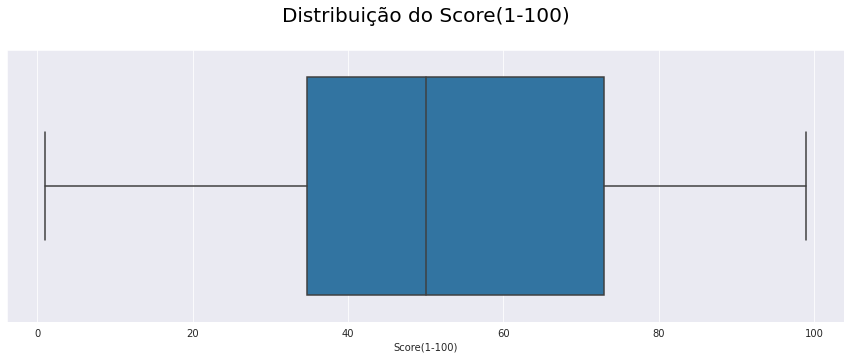

In [38]:
#Visualização boxplot para detecção de outliers
plt.figure(figsize=(15, 5))
plt.title("Distribuição do Score(1-100)\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "Score(1-100)")
plt.show()

### Análise bivariável (Correlações)

#### Distribuição da Idade, Renda Anual e Score agrupados por Gênero

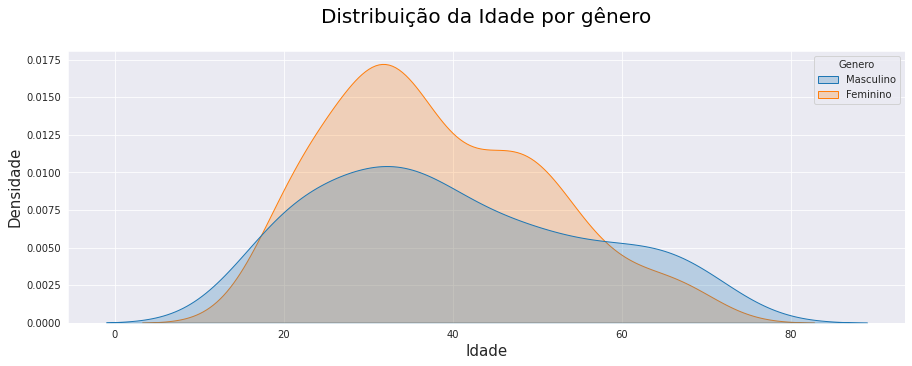

In [39]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Idade por gênero\n", fontsize=20, color='black')
plt.xlabel("Idade", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.kdeplot(df["Idade"], shade=True, hue=df["Genero"])
plt.show()

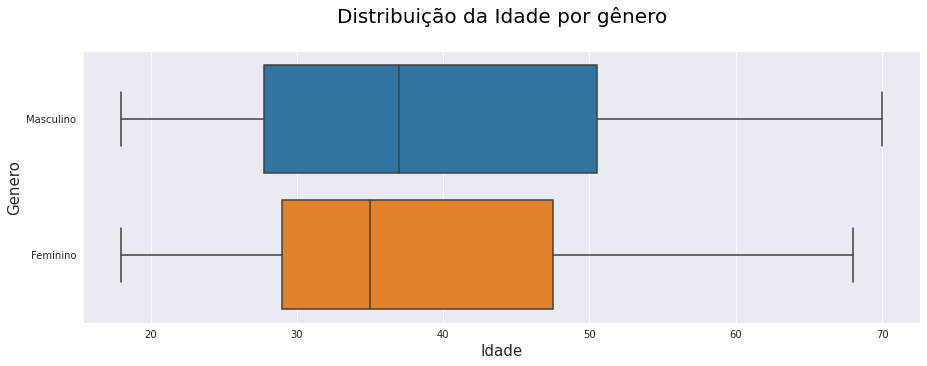

In [40]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Idade por gênero\n", fontsize=20, color='black')
plt.xlabel("Idade", fontsize=15)
plt.ylabel("Genero", fontsize=15)
sns.boxplot(data=df, x="Idade", y="Genero")
plt.show()

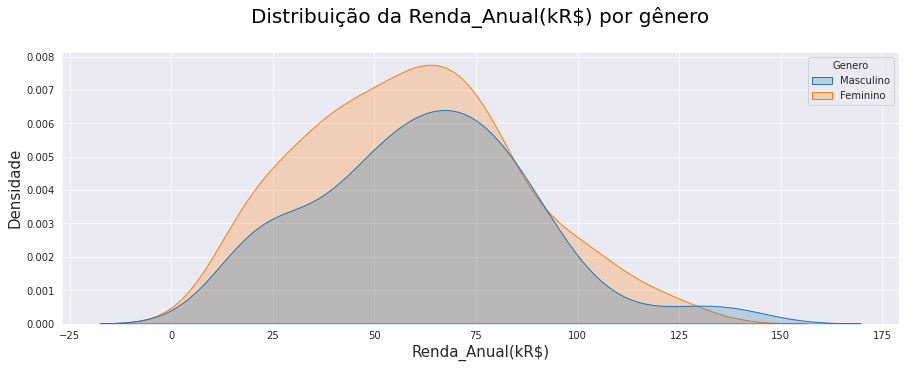

In [41]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Renda_Anual(kR$) por gênero\n", fontsize=20, color='black')
plt.xlabel("Renda_Anual(kR$)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.kdeplot(df["Renda_Anual(kR$)"], shade=True, hue=df["Genero"])
plt.show()

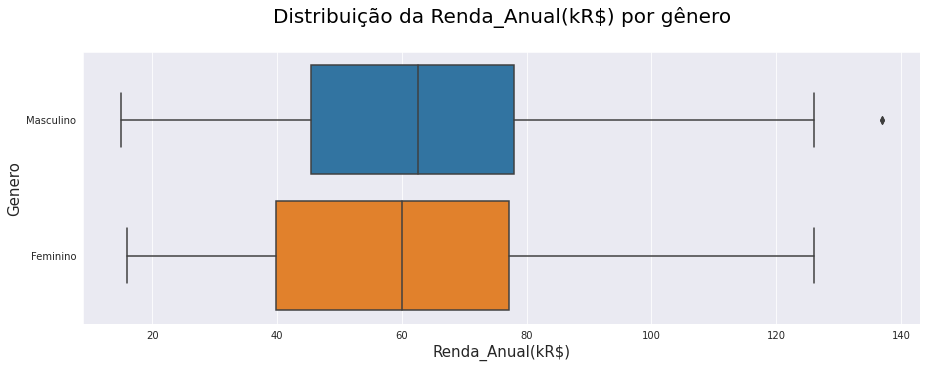

In [42]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Renda_Anual(kR$) por gênero\n", fontsize=20, color='black')
plt.ylabel("Genero",fontsize=15)
plt.xlabel("Renda_Anual(kR$)",fontsize=15)
sns.boxplot(data=df, x="Renda_Anual(kR$)", y="Genero")
plt.show()

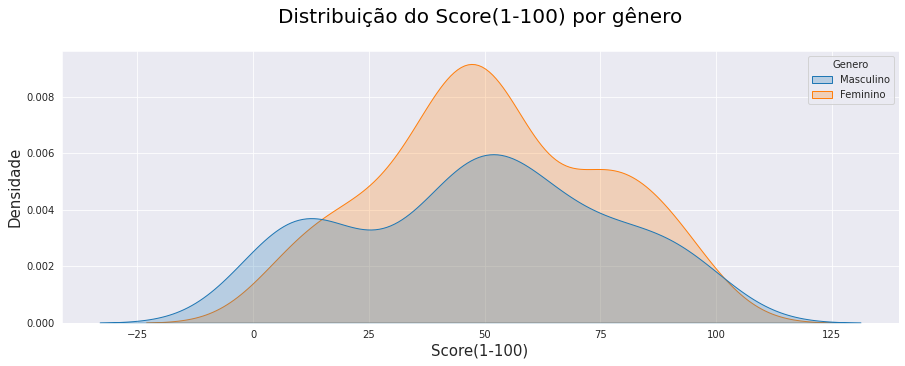

In [43]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição do Score(1-100) por gênero\n", fontsize=20, color='black')
plt.xlabel("Score(1-100)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.kdeplot(df["Score(1-100)"], shade=True, hue=df["Genero"])
plt.show()

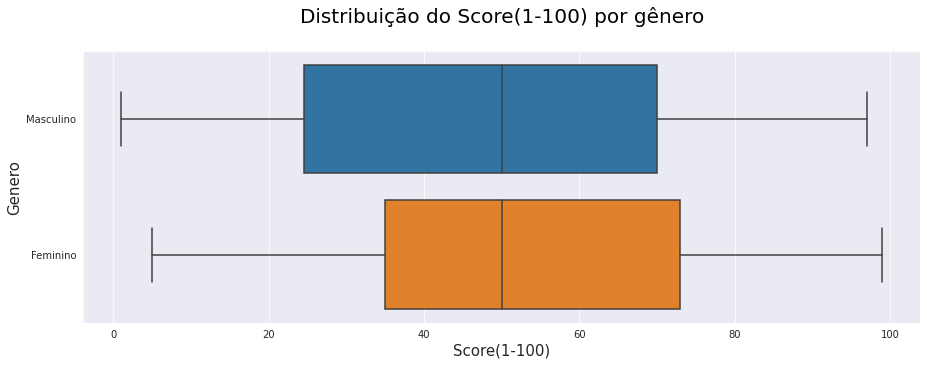

In [44]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição do Score(1-100) por gênero\n", fontsize=20, color='black')
plt.xlabel("Score(1-100)", fontsize=15)
plt.ylabel("Genero", fontsize=15)
sns.boxplot(data=df, x="Score(1-100)", y="Genero")
plt.show()

Importante destacar que, em geral, as mulheres apresentam uma maior frequencia do que os homens na distribuição de cada um dos atributos. A média da renda anual do genero masculino está maior que a média feminina devido ao outlier.

<Figure size 1080x360 with 0 Axes>

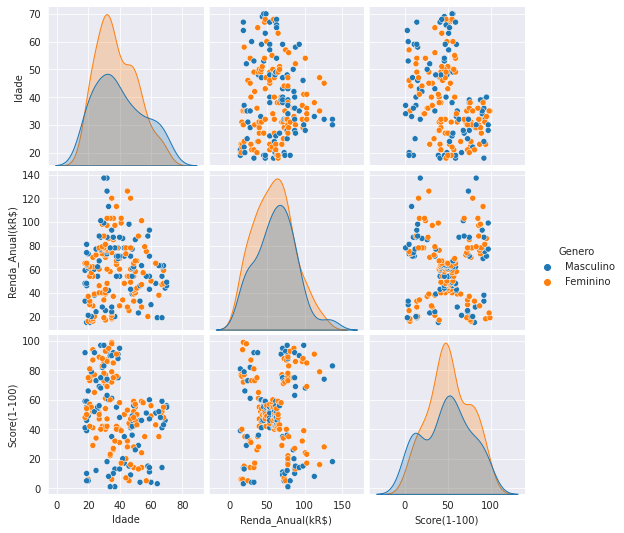

In [45]:
#Visualizando relação entre variáveis utilizando-se um pairplot
plt.figure(figsize=(15, 5))
sns.pairplot(data=df, hue="Genero")
plt.show()

In [46]:
#Coeficiente de correlação de Pearson entre os atributos numéricos contínuos
df.corr()

,Idade,Renda_Anual(kR$),Score(1-100)
Idade,1.000000,-0.012398,-0.327227
Renda_Anual(kR$),-0.012398,1.000000,0.009903
Score(1-100),-0.327227,0.009903,1.000000


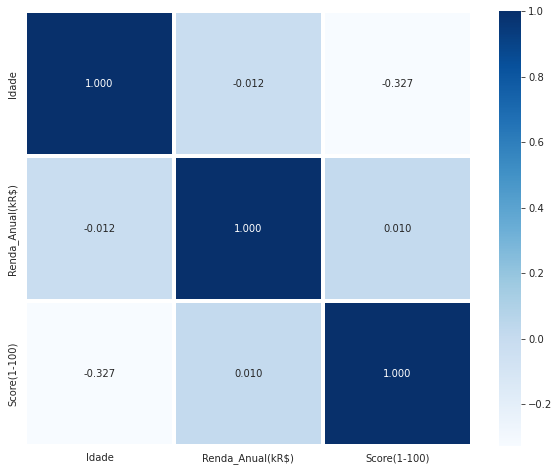

In [47]:
#Visualizando o coeficiente de correlação de Pearson
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidth=3, fmt=".3f")
plt.show()

Podemos observar que não há grandes correlações entre os atributos.

## Clustering (implementando K-means)

#### Entendendo o algoritmo K-Means e o método Elbow
- Exemplo: Clustering univariável (Renda Anual (kR$))

In [48]:
#Inicializando e entendendo o algoritmo
#Numero padrão de clusters é 8
clust1= KMeans()

In [49]:
#Treinando o algoritimo para o atributi escolhido
clust1.fit(df[['Renda_Anual(kR$)']])

KMeans()

In [50]:
#Listando os rótulos com numero de cluster padrão
#Como esperado, rótulos de 0-7
clust1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [51]:
#Comparando os rótulos com os dados iniciais
#Criando a coluna "Cluster_Renda" no dataframe
df["Cluster_Renda"]=clust1.labels_
df

,Genero,Idade,Renda_Anual(kR$),Score(1-100),Cluster_Renda
0,Masculino,19,15,39,4
1,Masculino,21,15,81,4
2,Feminino,20,16,6,4
3,Feminino,23,16,77,4
4,Feminino,31,17,40,4
...,...,...,...,...,...
195,Feminino,35,120,79,3
196,Feminino,45,126,28,3
197,Masculino,32,126,74,3
198,Masculino,32,137,18,3


In [52]:
#Número de clientes em cada Cluster_Renda
df["Cluster_Renda"].value_counts()

5    42
2    36
4    30
6    30
1    26
0    16
7    14
3     6
Name: Cluster_Renda, dtype: int64

##### **Elbow method**
- Determinando o número ideal de agrupamentos/clusters através do valor de WCSS (within cluster sum of squares) ou Inercia, entendido como medida de compactação do cluster.

In [53]:
wcss1=[] #Lista com os WCSS para cada i número de clusters
for i in range(1,11): #Loop para cada número de clusters (de 1 a 10 clusters)
  kmeans1=KMeans(n_clusters= i) #Inicializa o algoritimo com i número de clusters
  kmeans1.fit(df[['Renda_Anual(kR$)']]) #Treina o modelo para os dados inseridos
  wcss1.append(kmeans1.inertia_) #Calcula o WCSS para cada númerod de cluster e salva na lista wcss1

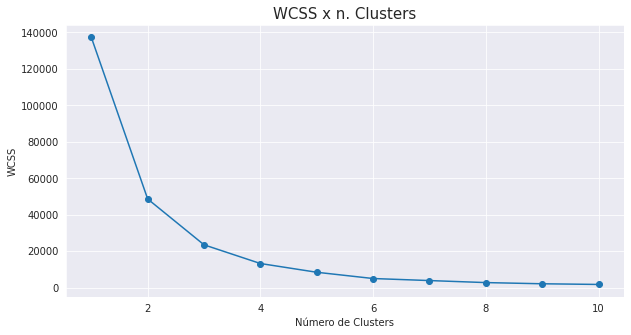

In [54]:
#Visualizando o WCSS com as respectivas quantidades de clusters
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss1, marker='o')
plt.title("WCSS x n. Clusters", fontsize= 15)
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()

Podemos observar que quanto maior o número de clusters, menor será o valore de WCSS. O número ideal de cluster e decidido pelo ponto onde há uma mudança brusca na inclicação do gráfico. No nosso exemplo, é onde o número de clusters é **3**

Mas em casos onde é difícil determinar o número ideal de clusters atavés da visualização do gráfico, podemos utilizar a função KneeLocator da biblioteca kneed

In [55]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
#Importando função
from kneed import KneeLocator

#Identificando o elbow
elbow1=KneeLocator(range(1,11), wcss1, curve='convex', direction='decreasing')
elbow1.elbow

3

Agora que o número ideal de cluster foi identificado, devemos colocá-lo no algoritimo KMeans e atualizar a quantidade de clusters em kmeans1

In [57]:
kmeans1=KMeans(n_clusters=3) #Inicializando algotitimo com 3 clusters
kmeans1.fit(df[["Renda_Anual(kR$)"]]) #Treinando com os dados
kmeans1.labels_ #Print dos rótulos identificados

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [58]:
#Atualizando a coluna Cluster_Renda com os novos rótulos (kmeans1.labels_)
df["Cluster_Renda"] = kmeans1.labels_
df

,Genero,Idade,Renda_Anual(kR$),Score(1-100),Cluster_Renda
0,Masculino,19,15,39,1
1,Masculino,21,15,81,1
2,Feminino,20,16,6,1
3,Feminino,23,16,77,1
4,Feminino,31,17,40,1
...,...,...,...,...,...
195,Feminino,35,120,79,2
196,Feminino,45,126,28,2
197,Masculino,32,126,74,2
198,Masculino,32,137,18,2


In [59]:
#Número de clientes em cada cluster
df["Cluster_Renda"].value_counts()

0    90
1    74
2    36
Name: Cluster_Renda, dtype: int64

### **Clustering bivariável (Renda Anual e Score)**

#### Elbow method

In [60]:
#Calculando valores de WCSS para cada número de clusters
wcss2=[]
for k in range(1,11):
  kmeans2=KMeans(n_clusters=k)
  kmeans2.fit(df[["Renda_Anual(kR$)", "Score(1-100)"]])
  wcss2.append(kmeans2.inertia_)

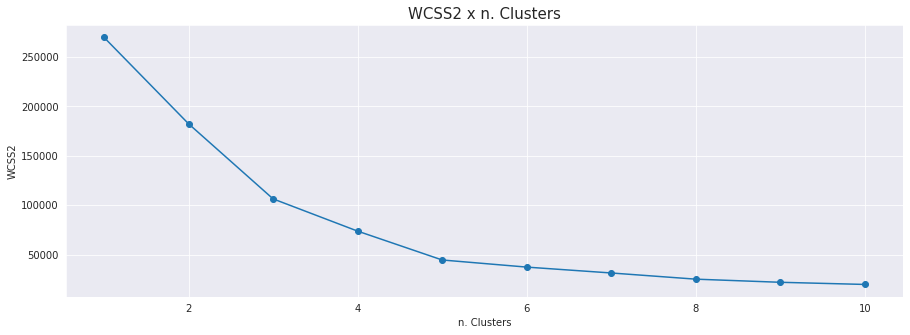

In [61]:
#Visualizando WCSS2 x número de clusters
plt.figure(figsize=(15,5))
plt.plot(range(1,11), wcss2, marker='o')
plt.title('WCSS2 x n. Clusters', fontsize=15)
plt.xlabel("n. Clusters")
plt.ylabel("WCSS2")
plt.show()

In [62]:
#Localizando o número de cluster ideal
elbow2=KneeLocator(range(1,11), wcss2, curve='convex', direction='decreasing')
elbow2.elbow

5

In [63]:
#Inicializando o algoritimo com o n. ideal de clusters
kmeans2=KMeans(n_clusters=5)
#Atribuido os dados
kmeans2.fit(df[["Renda_Anual(kR$)", "Score(1-100)"]])
#Criando a coluna Renda_Score_Cluster com os rótulos
df["Renda_Score_Cluster"]=kmeans2.labels_

In [64]:
df

,Genero,Idade,Renda_Anual(kR$),Score(1-100),Cluster_Renda,Renda_Score_Cluster
0,Masculino,19,15,39,1,4
1,Masculino,21,15,81,1,0
2,Feminino,20,16,6,1,4
3,Feminino,23,16,77,1,0
4,Feminino,31,17,40,1,4
...,...,...,...,...,...,...
195,Feminino,35,120,79,2,2
196,Feminino,45,126,28,2,3
197,Masculino,32,126,74,2,2
198,Masculino,32,137,18,2,3


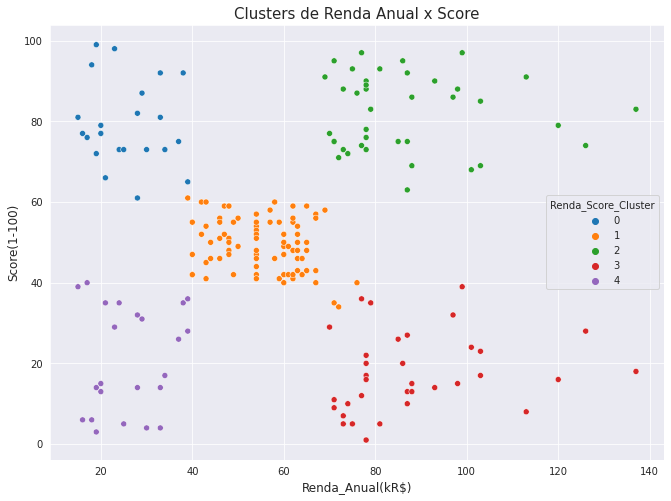

In [65]:
#Visualizando os clusters de Renda e Score
plt.figure(figsize=(11,8))
sns.scatterplot(data=df, x= "Renda_Anual(kR$)", y= "Score(1-100)", hue= "Renda_Score_Cluster", palette='tab10')
plt.title("Clusters de Renda Anual x Score", fontsize=15)
plt.xlabel("Renda_Anual(kR$)", fontsize=12)
plt.ylabel("Score(1-100)", fontsize=12)
plt.show()

In [66]:
#Porcentagem de homens e mulheres em cada cluster
pd.crosstab(df["Renda_Score_Cluster"],df["Genero"],normalize='index').round(2)

Genero,Feminino,Masculino
Renda_Score_Cluster,,
0,0.59,0.41
1,0.59,0.41
2,0.54,0.46
3,0.46,0.54
4,0.61,0.39


In [67]:
#Média de Renda, Idade e Score de cada cluster
df.groupby("Renda_Score_Cluster")["Idade", "Renda_Anual(kR$)", "Score(1-100)"].mean().round(2)

,Idade,Renda_Anual(kR$),Score(1-100)
Renda_Score_Cluster,,,
0,25.27,25.73,79.36
1,42.72,55.30,49.52
2,32.69,86.54,82.13
3,41.11,88.20,17.11
4,45.22,26.30,20.91


### **Clustering multivariável: Idade, Renda e Score**

In [68]:
#Calculando valores de WCSS para cada número de clusters 
wcss3=[]
for j in range(1,11):
  kmeans3=KMeans(n_clusters=j)
  kmeans3.fit(df[["Idade", "Renda_Anual(kR$)", "Score(1-100)"]])
  wcss3.append(kmeans3.inertia_)

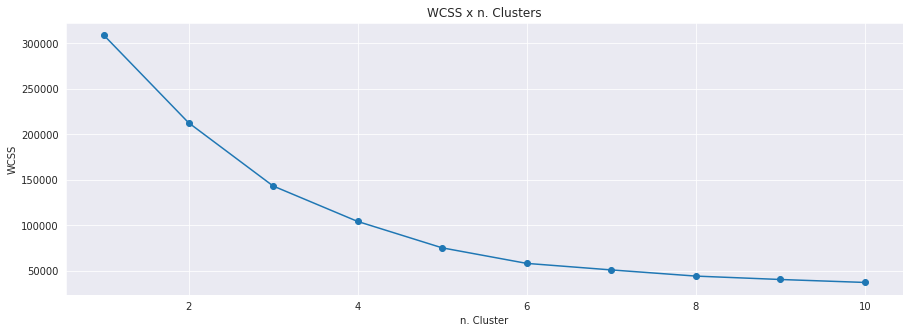

In [69]:
#Visualizando os valores de WCSS
plt.figure(figsize=(15,5))
plt.plot(range(1,11), wcss3, marker='o')
plt.title("WCSS x n. Clusters")
plt.xlabel("n. Cluster")
plt.ylabel("WCSS")
plt.show()

In [70]:
#Determinando o número ideal de clusters
elbow3=KneeLocator(range(1,11), wcss3, curve='convex', direction='decreasing')
elbow3.elbow

4

In [71]:
#Inicializando o algoritmo com o número ideal de clusters
kmeans3=KMeans(n_clusters=4)
kmeans3.fit(df[["Idade", "Renda_Anual(kR$)", "Score(1-100)"]])
#Criando a coluna Cluster
df["Cluster"]= kmeans3.labels_

In [72]:
#Visualizando clusters Idade x Renda x Score
import plotly.express as px

In [73]:
fig = px.scatter_3d(df, x='Renda_Anual(kR$)', y='Score(1-100)', z='Idade',
              color='Cluster')
fig.show()

#### **Análise final**

Porcentagem de homens e mulheres em cada cluster:

In [74]:
pd.crosstab(df["Cluster"],df["Genero"],normalize='index').round(2)

Genero,Feminino,Masculino
Cluster,,
0,0.50,0.50
1,0.47,0.53
2,0.54,0.46
3,0.62,0.38


Média da Idade, Renda e Score

In [75]:
df.groupby("Cluster")["Idade", "Renda_Anual(kR$)", "Score(1-100)"].mean(2).round(2)

,Idade,Renda_Anual(kR$),Score(1-100)
Cluster,,,
0,24.82,28.71,74.25
1,40.39,87.00,18.63
2,32.69,86.54,82.13
3,44.89,48.71,42.63


Distribuição da idade para cada cluster

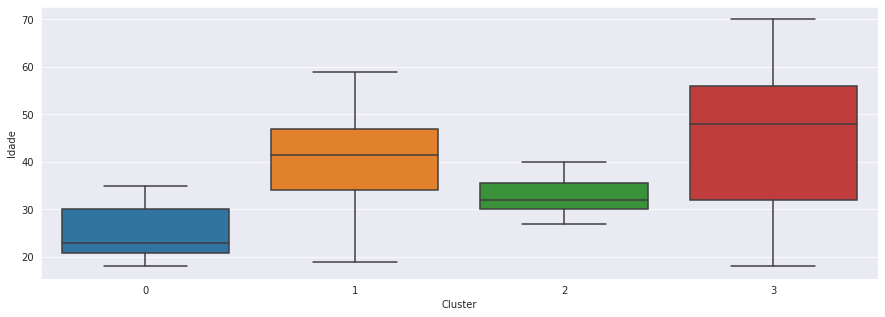

In [76]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="Cluster", y="Idade")
plt.show()

Distribuição da renda anual para cada cluster

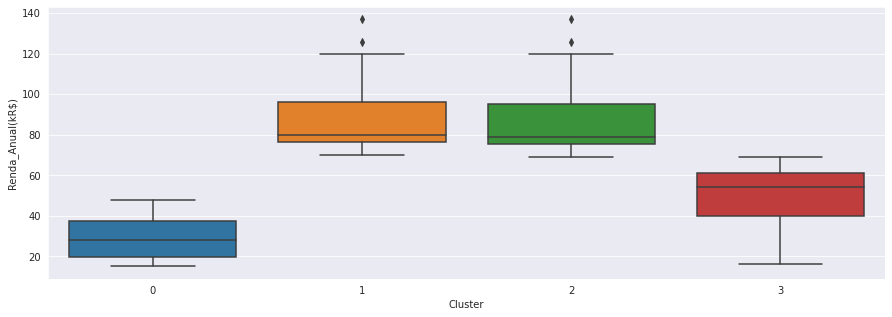

In [77]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="Cluster", y="Renda_Anual(kR$)")
plt.show()

Distribuição do Score para cada cluster

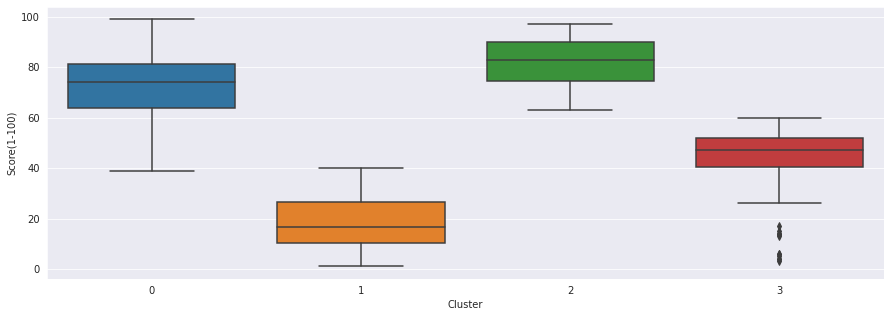

In [78]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="Cluster", y="Score(1-100)")
plt.show()

Não há grupos distintos com relação a idade

In [80]:
##Copiando um dataframe para realizar o drop de colunas
df1 = df

In [81]:
df1.head()

,Genero,Idade,Renda_Anual(kR$),Score(1-100),Cluster_Renda,Renda_Score_Cluster,Cluster
0,Masculino,19,15,39,1,4,0
1,Masculino,21,15,81,1,0,0
2,Feminino,20,16,6,1,4,3
3,Feminino,23,16,77,1,0,0
4,Feminino,31,17,40,1,4,3


In [82]:
##Retirando colunas de clusters de renda e renda_score
df1.drop(columns=["Cluster_Renda", "Renda_Score_Cluster"], inplace=True)

In [84]:
df1.head()

,Genero,Idade,Renda_Anual(kR$),Score(1-100),Cluster
0,Masculino,19,15,39,0
1,Masculino,21,15,81,0
2,Feminino,20,16,6,3
3,Feminino,23,16,77,0
4,Feminino,31,17,40,3


In [86]:
#Número de clientes em cada cluster com base na renda, score e idade
df1.groupby("Cluster").size()

Cluster
0    28
1    38
2    39
3    95
dtype: int64

In [89]:
##Descrição estatítica de cada cluster
df[df["Cluster"] == 0].describe().round()

,Idade,Renda_Anual(kR$),Score(1-100),Cluster
count,28.0,28.0,28.0,28.0
mean,25.0,29.0,74.0,0.0
std,6.0,10.0,14.0,0.0
min,18.0,15.0,39.0,0.0
25%,21.0,20.0,64.0,0.0
50%,23.0,28.0,74.0,0.0
75%,30.0,37.0,81.0,0.0
max,35.0,48.0,99.0,0.0


In [90]:
df[df["Cluster"] == 1].describe().round()

,Idade,Renda_Anual(kR$),Score(1-100),Cluster
count,38.0,38.0,38.0,38.0
mean,40.0,87.0,19.0,1.0
std,11.0,16.0,11.0,0.0
min,19.0,70.0,1.0,1.0
25%,34.0,76.0,10.0,1.0
50%,42.0,80.0,16.0,1.0
75%,47.0,96.0,27.0,1.0
max,59.0,137.0,40.0,1.0


In [91]:
df[df["Cluster"] == 2].describe().round()

,Idade,Renda_Anual(kR$),Score(1-100),Cluster
count,39.0,39.0,39.0,39.0
mean,33.0,87.0,82.0,2.0
std,4.0,16.0,9.0,0.0
min,27.0,69.0,63.0,2.0
25%,30.0,76.0,74.0,2.0
50%,32.0,79.0,83.0,2.0
75%,36.0,95.0,90.0,2.0
max,40.0,137.0,97.0,2.0


In [92]:
df[df["Cluster"] == 3].describe().round()

,Idade,Renda_Anual(kR$),Score(1-100),Cluster
count,95.0,95.0,95.0,95.0
mean,45.0,49.0,43.0,3.0
std,15.0,15.0,15.0,0.0
min,18.0,16.0,3.0,3.0
25%,32.0,40.0,40.0,3.0
50%,48.0,54.0,47.0,3.0
75%,56.0,61.0,52.0,3.0
max,70.0,69.0,60.0,3.0


In [93]:
df1.to_csv("clientes_shopping_tableau.csv")